In [1]:
#import of libraries 
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


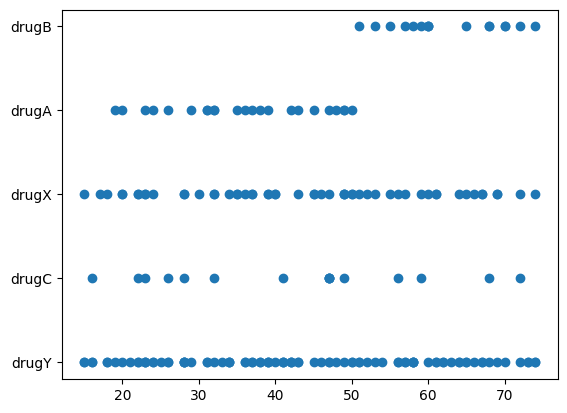

In [3]:
plt.scatter(df.Age,df.Drug)
plt.show()

#as here can we see it is not linear data so we cant use regression here so we use claasification <br>
#here we are using decesion tree classifire

In [4]:
#see what is attributes of our data set 
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

#Pre-processing

#here we define 
X as the Feature Matrix (data of my_data) <br>
y as the response vector (target)

In [5]:
x = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = df[['Drug']]
y[0:5]

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [9]:


x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]
print(x_train.shape)
print(y_train.shape)




(140, 5)
(140, 1)


In [10]:
print(x_test.shape)
print(y_test.shape)

(60, 5)
(60, 1)


<h2>Modeling</h2>

In [11]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
Tree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [13]:
pred = Tree.predict(x_test)

In [14]:
print(pred[0:5])
print(y_test[0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
      Drug
40   drugY
51   drugX
139  drugX
197  drugX
170  drugX


In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

DecisionTrees's Accuracy:  0.9833333333333333


#here i am doing experiment with diffrent value of depth

In [16]:
depth = 60
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))
ConfustionMx = [];
for n in range(1,depth):
  model = DecisionTreeClassifier(criterion='entropy',max_depth=n).fit(x_train,y_train)
  pred = model.predict(x_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, pred)
  
mean_acc

array([0.7       , 0.81666667, 0.81666667, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333])

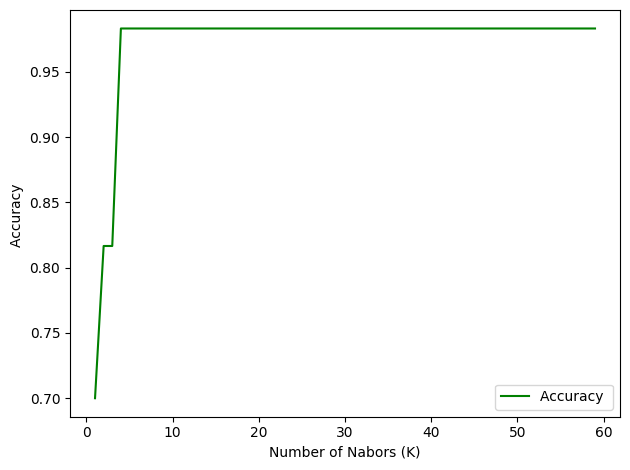

In [17]:
plt.plot(range(1,depth),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#here as we can see accuracy remains constant after depth = 4 because dataset has 5 featurs so that it can go thourgh depth 4 

#here se vizulization so we can get better idea 

In [21]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [20]:
!pip install --upgrade scikit-learn==0.20.3

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Prathamesh\\AppData\\Local\\Temp\\pip-install-iw68f2fy\\scikit-learn_d4d95a5887fe436696d259d0af8bf784\\setup.py'"'"'; __file__='"'"'C:\\Users\\Prathamesh\\AppData\\Local\\Temp\\pip-install-iw68f2fy\\scikit-learn_d4d95a5887fe436696d259d0af8bf784\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Prathamesh\AppData\Local\Temp\pip-wheel-jfupqp9k'
       cwd: C:\Users\Prathamesh\AppData\Local\Temp\pip-install-iw68f2fy\scikit-learn_d4d95a5887fe436696d259d0af8bf784\
  Complete output (693 lines):
  Partial import of sklearn during the build


  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\prathamesh\appdata\local\programs\python\python39\lib\site-packages\scikit_learn-1.3.0.dist-info\
   from C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\Lib\site-packages\~cikit_learn-1.3.0.dist-info
  Moving to c:\users\prathamesh\appdata\local\programs\python\python39\lib\site-packages\sklearn\
   from C:\Users\Prathamesh\AppData\Local\Programs\Python\Python39\Lib\site-packages\~klearn
